In [1]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load and resize the image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array / 255.0  # Normalize if needed

# Example usage
img_array = preprocess_image(r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cat\2512.jpg")
predictions = model.predict(img_array)


NameError: name 'model' is not defined

In [6]:
import pandas as pd
import tensorflow as tf
print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)


AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

In [3]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define paths to your training and validation datasets
train_dir = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\train"  # Update with your train directory
validation_dir = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\validation"  # Update with your validation directory

# Define image parameters
img_height, img_width = 150, 150  # Image size for resizing
batch_size = 32

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))  # Adjust the output layer to the number of classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

# Fit the model
model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model as animal_classifier_Batch_1.h5
model.save('animal_classifier_Batch_1.h5')


Found 1994 images belonging to 13 classes.
Found 565 images belonging to 13 classes.


c:\Users\Rushi\OneDrive\Desktop\ABCD\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Rushi\OneDrive\Desktop\ABCD\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 810ms/step - accuracy: 0.1896 - loss: 2.4899 - val_accuracy: 0.3080 - val_loss: 2.1703
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3116 - loss: 2.1782 - val_accuracy: 0.3646 - val_loss: 2.0634
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3582 - loss: 2.1036 - val_accuracy: 0.3858 - val_loss: 1.9864
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3393 - loss: 2.0427 - val_accuracy: 0.3929 - val_loss: 1.9398
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3799 - loss: 2.0038 - val_accuracy: 0.4195 - val_loss: 1.9074
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3896 - loss: 1.9234 - val_accuracy: 0.4248 - val_loss: 1.8540
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.3927 - loss: 1.9088 - val_accuracy: 0.4177 - val_loss: 1.9196
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4098 - loss: 1.8840 - val_accuracy: 0.4496 - val_lo

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image_label(model, image_path, target_size=(128, 128)):  # Set to (128, 128)
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the integer value directly
    
    # Use train_generator to get class labels
    class_labels = train_generator.class_indices
    label_name = list(class_labels.keys())[list(class_labels.values()).index(predicted_class)]
    
    return label_name

# Example prediction
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"

predicted_label = predict_image_label(model, image_path)
print("Predicted label:", predicted_label)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36992, but received input with shape (1, 25088)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [3]:
from tensorflow.keras.models import load_model

# Load your model
model = load_model(r"C:\Users\Rushi\OneDrive\Desktop\ABCD\scripts\animal_classifier_Batch_1.h5")

# Print the expected input shape
print("Model Input Shape:", model.input_shape)


Model Input Shape: (None, 150, 150, 3)


In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input  # Only use if your model is based on MobileNetV2

def preprocess_image(image_path):
    # Load the image with the correct target size (e.g., 128x128)
    img = image.load_img(image_path, target_size=(128, 128))
    
    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0  # Normalizing between 0 and 1
    
    # Expand dimensions to match the model's expected input
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image (e.g., MobileNetV2 preprocessing)
    img_array = preprocess_input(img_array)  # Optional, only if using specific model pre-processing
    
    return img_array

image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"
img_array = preprocess_image(image_path)

print("Processed image shape:", img_array.shape)  # Check the shape (should be (1, 128, 128, 3))


Processed image shape: (1, 128, 128, 3)


In [5]:
def predict_image_label(model, img_array):
    # Make prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class = np.argmax(predictions, axis=1)[0]  # Extracting the predicted class index (as an integer)
    
    # Class labels mapping
    class_labels = {
        0: 'Cat',
        1: 'Chimpanzee',
        2: 'Cow',
        3: 'Crow',
        4: 'Deer',
        5: 'Dog',
        6: 'Eagle',
        7: 'Elephant',
        8: 'Goat',
        9: 'Hippopotamus',
        10: 'Monkey',
        11: 'Sparrow',
        12: 'Wolf'
    }
    
    # Map the predicted index to the corresponding class label
    predicted_label = class_labels.get(predicted_class, "Unknown")
    
    return predicted_label

predicted_label = predict_image_label(model, img_array)
print("Predicted label:", predicted_label)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36992, but received input with shape (1, 25088)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [6]:
print(model.input_shape)


(None, 150, 150, 3)


In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Resize the image to target size
    img_array = img_to_array(img) / 255.0  # Convert image to numpy array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image_label(model, img_array):
    try:
        # Ensure the input image has the correct shape
        if img_array.shape[1:] != (128, 128, 3):
            raise ValueError("Image array has the wrong shape. Expected shape (128, 128, 3), but got shape: {}".format(img_array.shape[1:]))

        # Make prediction
        predictions = model.predict(img_array)

        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]  # Extracting the predicted class index (as an integer)

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"  # Provide the path to the image
img_array = preprocess_image(image_path)  # Preprocess the image

# Predict the label
predicted_label = predict_image_label(model, img_array)
if predicted_label:
    print("Predicted label:", predicted_label)


Error during prediction: Exception encountered when calling Sequential.call().

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36992, but received input with shape (1, 25088)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None


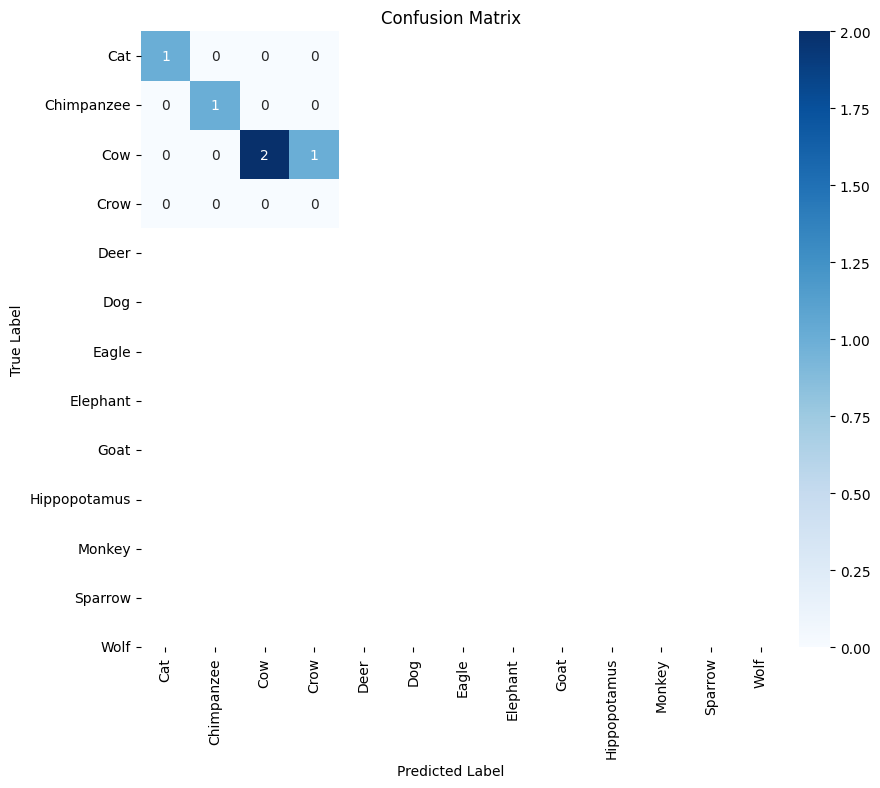

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example true and predicted labels (you should replace these with your actual data)
true_labels = ['Dog', 'Cat', 'Dog', 'Chimpanzee', 'Dog']  # Example true labels
predicted_labels = ['Dog', 'Cat', 'Sparrow', 'Chimpanzee', 'Dog']  # Example predicted labels

# Define a mapping from class names to indices
class_labels = {
    0: 'Cat',
    1: 'Chimpanzee',
    2: 'Cow',
    3: 'Crow',
    4: 'Deer',
    5: 'Dog',
    6: 'Eagle',
    7: 'Elephant',
    8: 'Goat',
    9: 'Hippopotamus',
    10: 'Monkey',
    11: 'Sparrow',
    12: 'Wolf'
}

# Create a reverse mapping for easy lookup
label_to_index = {label: index for index, label in class_labels.items()}

# Convert true and predicted labels to their respective indices
true_labels_indices = [label_to_index[label] for label in true_labels if label in label_to_index]
predicted_labels_indices = [label_to_index[label] for label in predicted_labels if label in label_to_index]

# Ensure both lists are of the same length
if len(true_labels_indices) != len(predicted_labels_indices):
    print("Warning: The number of true labels and predicted labels do not match!")

# Create the confusion matrix
cm = confusion_matrix(true_labels_indices, predicted_labels_indices)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):  # Resize image to the target size
    # Load and resize the image
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array and normalize pixel values to [0, 1]
    img_array = img_to_array(img) / 255.0
    
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image
        img_array = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]  # Extract the predicted class index (as an integer)

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img_array  # Returning both label and image array for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"  # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
else:
    print("Prediction failed.")


Error during prediction: Exception encountered when calling Sequential.call().

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36992, but received input with shape (1, 86528)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None
Prediction failed.


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (assuming you want to resize to 224x224 for a pretrained model like VGG16 or ResNet)
def preprocess_image(image_path, target_size=(224, 224)):  
    # Load and resize the image
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # If model expects a flattened input, flatten the array
    img_array = img_array.flatten()  # Flatten the image to 1D array
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image
        img_array = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img_array  # Returning both label and image array for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"  # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
else:
    print("Prediction failed.")


Error during prediction: Exception encountered when calling Sequential.call().

Invalid input shape for input Tensor("data:0", shape=(1, 150528), dtype=float32). Expected shape (None, 150, 150, 3), but input has incompatible shape (1, 150528)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150528), dtype=float32)
  • training=False
  • mask=None
Prediction failed.


In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image
        img_array = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img_array  # Returning both label and image array for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"  # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
else:
    print("Prediction failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted label: Cow


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: Cow


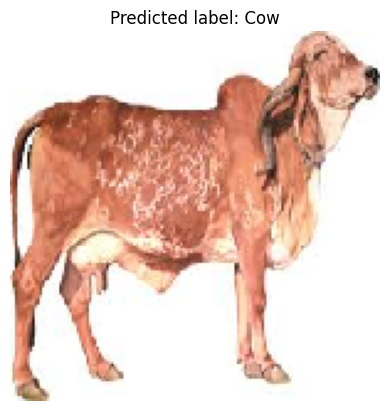

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_download (7).jpeg"  # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted label: Goat


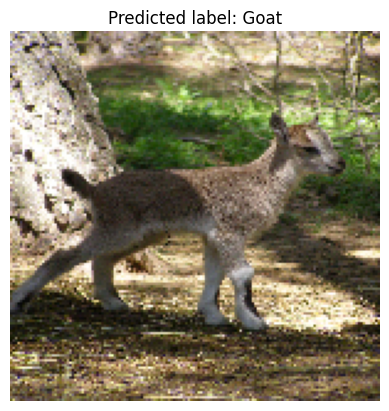

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Goat\ნიამორი.jpg" # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: Chimpanzee


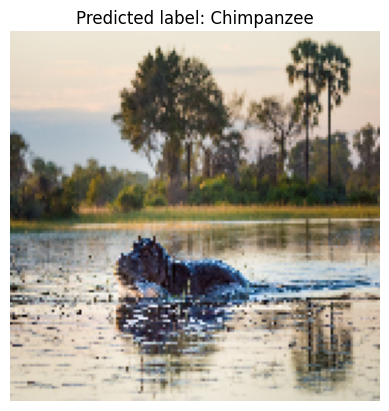

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Hippopotamus\w1505-pelo-camp-hippo.jpg" # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: Monkey


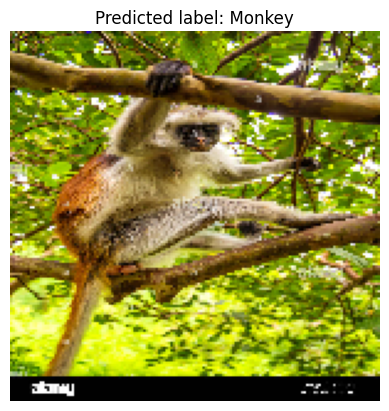

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Monkey\shuffled_1_wild-monkey-sits-on-a-tree-in-wild-nature-of-african-jungle-in-zanzibar-and-looks-into-the-camera-close-up-shot-TARMWY.jpg" # Path to the image
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: Sparrow


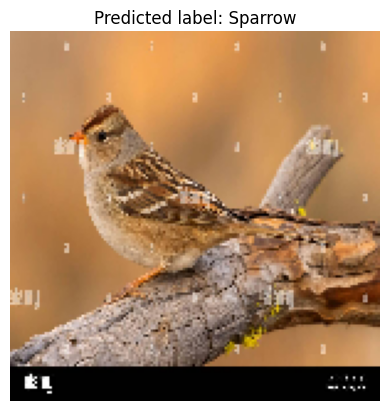

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Sparrow\shuffled_8_chipping-sparrow-spizella-passerina-cabin-lake-viewing-blind-deschutes-national-forest-oregon-2DEY454.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted label: Wolf


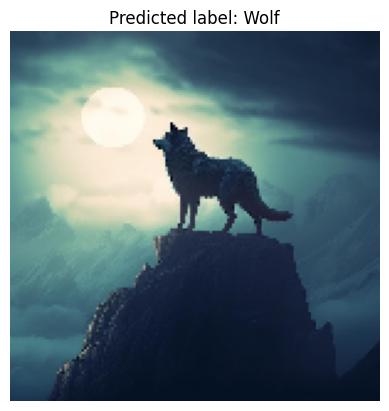

In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Wolf\shuffled_14_forest-wolf-howling-full-moon-night-mountain-peak-forest-scene_972999-5.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted label: Elephant


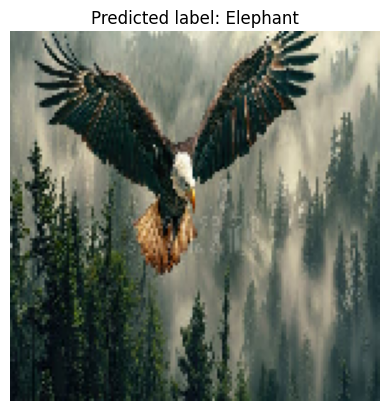

In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Eagle\shuffled_11_american-bald-eagle-flying-over-beautiful-forest-landscape-wild-bird-spread-wings-flight-328270822.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted label: Dog


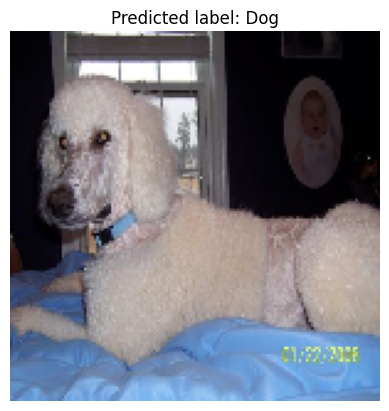

In [62]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Dog\2506.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted label: Deer


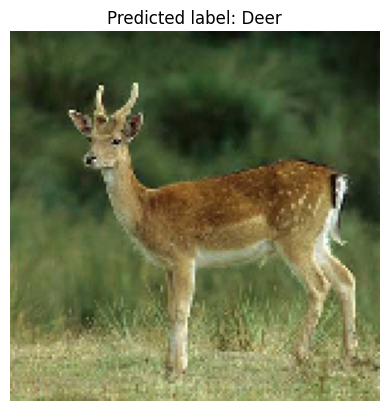

In [61]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Deer\shuffled_47_fallow-deer-young-buck.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted label: Crow


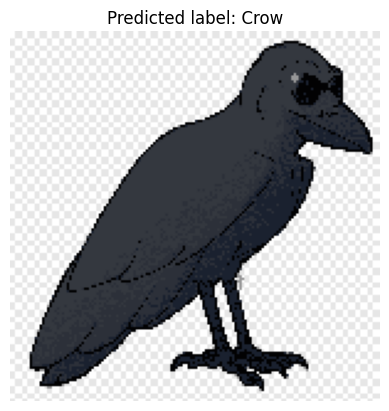

In [60]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Crow\shuffled_9_png-clipart-american-crow-leftovers-com-the-endless-forest-info-darude-sandstorm-twitch-baking-fauna.png"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: Cow


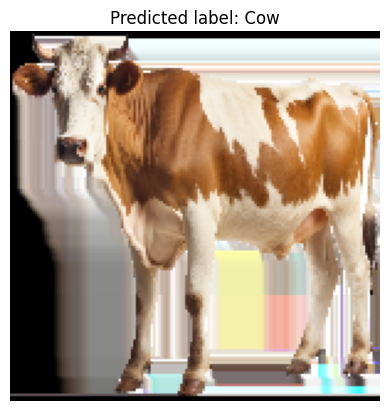

In [59]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_cow-with-ai-generated-free-png.png"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: Chimpanzee


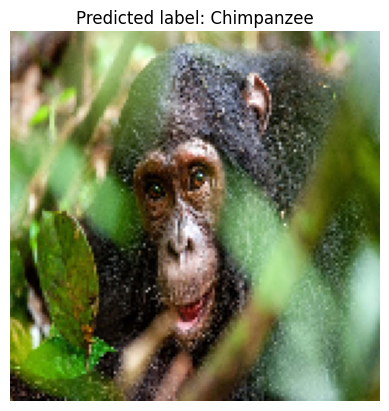

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Chimpanzee\shuffled_6_Chimpanzees-ground-trees-branch-swing-arms-distance.jpg"
predicted_label, img = predict_image_label(model, image_path)
if predicted_label:
    print("Predicted label:", predicted_label)
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label: Deer


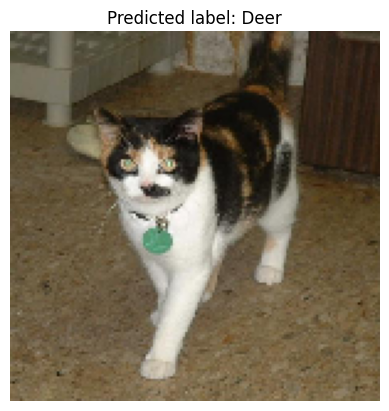

In [57]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\train\Cat\2585.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

AGAIN FROM STARING FOR SAFETY

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label: Deer


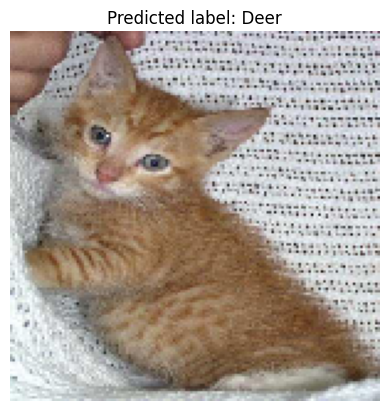

In [56]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\train\Cat\2594.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted label: Chimpanzee


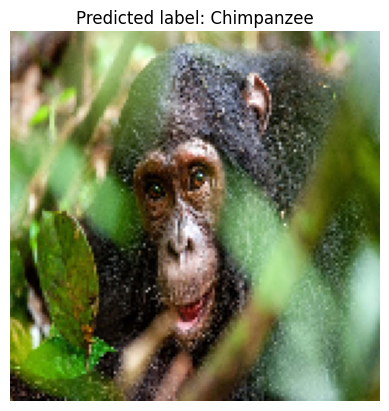

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Chimpanzee\shuffled_6_Chimpanzees-ground-trees-branch-swing-arms-distance.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: Cow


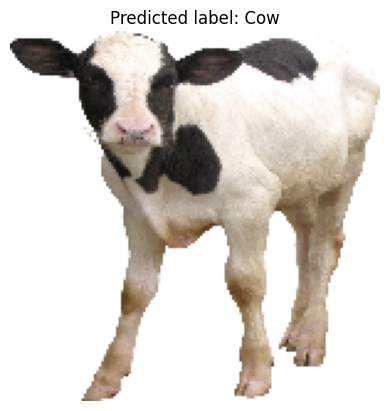

In [46]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Cow\Cow_pngimg.com - cow_PNG50558.png"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted label: Crow


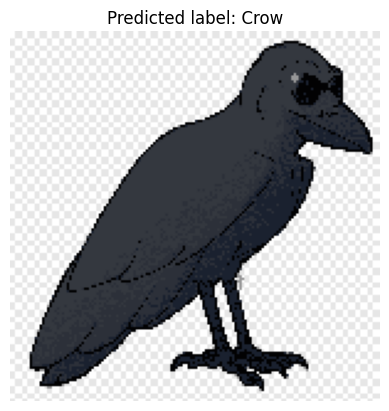

In [45]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Crow\shuffled_9_png-clipart-american-crow-leftovers-com-the-endless-forest-info-darude-sandstorm-twitch-baking-fauna.png"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted label: Deer


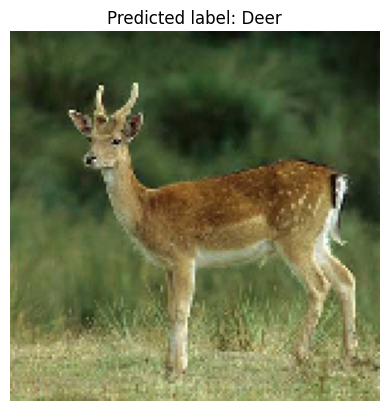

In [43]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Deer\shuffled_47_fallow-deer-young-buck.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: Dog


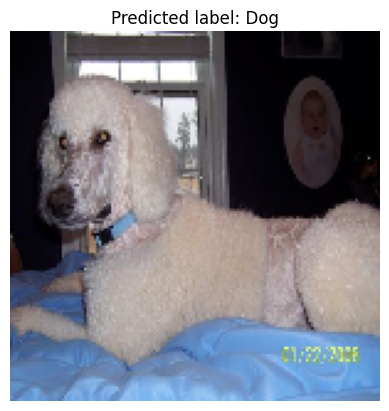

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Dog\2506.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted label: Deer


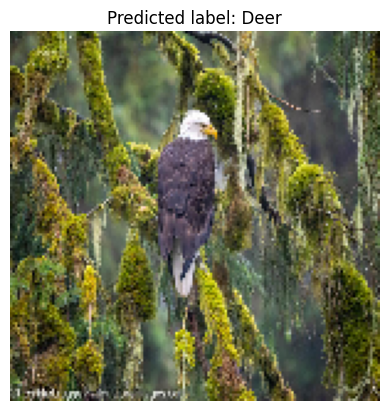

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Eagle\shuffled_5_220802-140-Bald-Eagle.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: Elephant


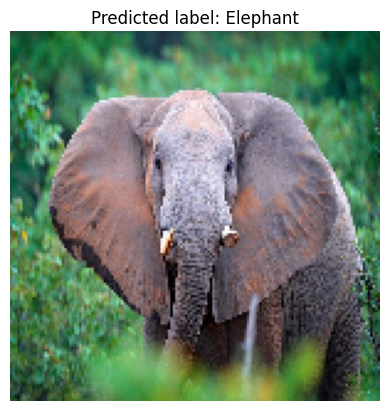

In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Elephant\shuffled_21_African-forest-elephant-1.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted label: Goat


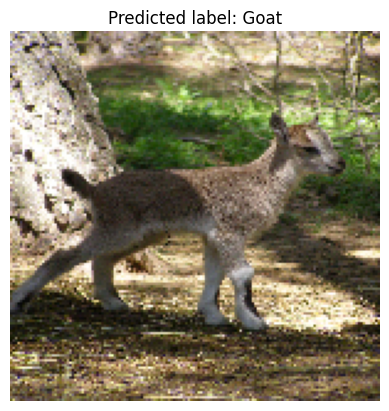

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Goat\ნიამორი.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted label: Elephant


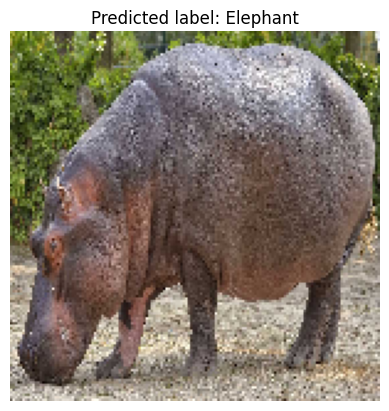

In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Hippopotamus\African_Forest_Hippopotamus.png"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted label: Monkey


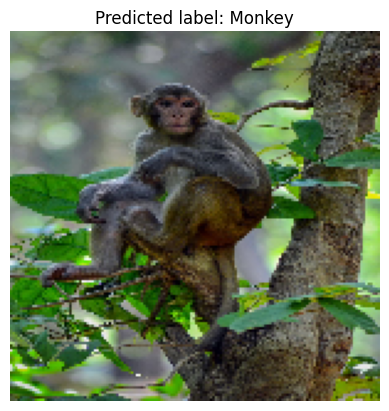

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Monkey\shuffled_6_monkey-nature-animal-wild.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted label: Sparrow


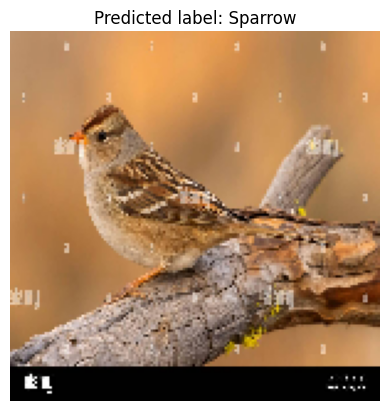

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Sparrow\shuffled_8_chipping-sparrow-spizella-passerina-cabin-lake-viewing-blind-deschutes-national-forest-oregon-2DEY454.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label: Wolf


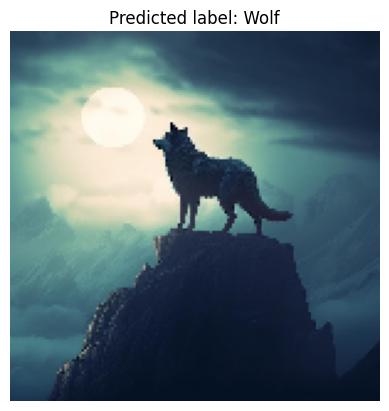

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image (resize to 150x150 and scale)
def preprocess_image(image_path, target_size=(150, 150)):  
    # Load and resize the image to the target size (150x150)
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Add a batch dimension (1 sample)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img

# Function to predict the label
def predict_image_label(model, image_path):
    try:
        # Preprocess the image and get the original image
        img_array, img = preprocess_image(image_path)
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class index
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Class labels mapping
        class_labels = {
            0: 'Cat',
            1: 'Chimpanzee',
            2: 'Cow',
            3: 'Crow',
            4: 'Deer',
            5: 'Dog',
            6: 'Eagle',
            7: 'Elephant',
            8: 'Goat',
            9: 'Hippopotamus',
            10: 'Monkey',
            11: 'Sparrow',
            12: 'Wolf'
        }

        # Map the predicted index to the corresponding class label
        predicted_label = class_labels.get(predicted_class, "Unknown")
        
        return predicted_label, img  # Returning both label and image for further use
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
image_path = r"C:\Users\Rushi\OneDrive\Desktop\ABCD\dataset\test\Wolf\shuffled_14_forest-wolf-howling-full-moon-night-mountain-peak-forest-scene_972999-5.jpg"
predicted_label, img = predict_image_label(model, image_path)

if predicted_label:
    print("Predicted label:", predicted_label)
    
    # Display the image along with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Prediction failed.")